In [1]:
import pandas as pd

# 读取数据
data = pd.read_csv('abalone.data.csv')

# 查看数据的基本信息
print('数据基本信息：')
data.info()

# 查看数据集行数和列数
rows, columns = data.shape

if rows > 0:
    # 查看数据集前几行
    print('数据前几行信息：')
    print(data.head().to_csv(sep='\t', na_rep='nan'))
else:
    print('数据为空。')

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
数据前几行信息：
	gender	Length	Diameter	Height	Whole weight	Shucked weight	Viscera weight	Shell weight	Rings
0	M	0.455	0.365	0.095	0.514	0.2245	0.101	0.15	15
1	M	0.35	0.265	0.09	0.2255	0.0995	0.0485	0.07	7
2	F	0.53	0.42	0.135	0.677	0.2565	0.1415	0.21	9
3	M	0.44	0.365	0.125	0.516	0.2155	0.114	0.155	10
4	I	0.33	0.255	0.08	0.205	0.0895

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# 读取数据
data = pd.read_csv('abalone.data.csv')

# 分离分类特征和数值特征
categorical_features = ['gender']
numerical_features = [col for col in data.columns if col != 'gender' and col != 'Rings']

# 对分类特征进行独热编码
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first'避免共线性问题
encoded_features = encoder.fit_transform(data[categorical_features])

# 创建独热编码的DataFrame
encoded_df = pd.DataFrame(
    encoded_features,
    columns=[f'gender_{cat}' for cat in encoder.categories_[0][1:]]  # 使用第一个类别作为参考
)

# 将编码后的特征与原始数据合并
data_encoded = pd.concat([data.drop(categorical_features, axis=1).reset_index(drop=True), 
                          encoded_df.reset_index(drop=True)], axis=1)

# 标准化数值特征
scaler = MinMaxScaler()
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

# 分割数据
X = data_encoded.drop('Rings', axis=1)
y = data_encoded['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 打印处理后的数据前几行
print("处理后的数据前几行:")
print(data_encoded.head())

# 打印训练集和测试集的形状
print(f"训练集形状: {X_train.shape}")
print(f"测试集形状: {X_test.shape}")


处理后的数据前几行:
     Length  Diameter    Height  Whole weight  Shucked weight  Viscera weight  \
0  0.513514  0.521008  0.084071      0.181335        0.150303        0.132324   
1  0.371622  0.352941  0.079646      0.079157        0.066241        0.063199   
2  0.614865  0.613445  0.119469      0.239065        0.171822        0.185648   
3  0.493243  0.521008  0.110619      0.182044        0.144250        0.149440   
4  0.344595  0.336134  0.070796      0.071897        0.059516        0.051350   

   Shell weight  Rings  gender_I  gender_M  
0      0.147982     15       0.0       1.0  
1      0.068261      7       0.0       1.0  
2      0.207773      9       0.0       0.0  
3      0.152965     10       0.0       1.0  
4      0.053313      7       1.0       0.0  
训练集形状: (2923, 9)
测试集形状: (1254, 9)


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# 创建线性回归模型
lr_model = LinearRegression()

# 训练模型
lr_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = lr_model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("线性回归模型评估:")
print(f"均方误差 (MSE): {mse:.4f}")
print(f"均方根误差 (RMSE): {rmse:.4f}")
print(f"平均绝对误差 (MAE): {mae:.4f}")
print(f"决定系数 (R²): {r2:.4f}")

# 查看各特征的系数
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
})
print("\n特征系数:")
print(coefficients.sort_values(by='Coefficient', ascending=False))


线性回归模型评估:
均方误差 (MSE): 4.7848
均方根误差 (RMSE): 2.1874
平均绝对误差 (MAE): 1.5832
决定系数 (R²): 0.5288

特征系数:
          Feature  Coefficient
3    Whole weight    28.148516
2          Height    11.446565
6    Shell weight     7.983249
1        Diameter     6.082596
0          Length     0.506736
8        gender_M     0.096717
7        gender_I    -0.726801
5  Viscera weight    -8.124979
4  Shucked weight   -31.998073


决策树模型性能 (默认参数):
均方误差 (MSE): 8.5853
均方根误差 (RMSE): 2.9301
平均绝对误差 (MAE): 2.0271
决定系数 (R²): 0.1545


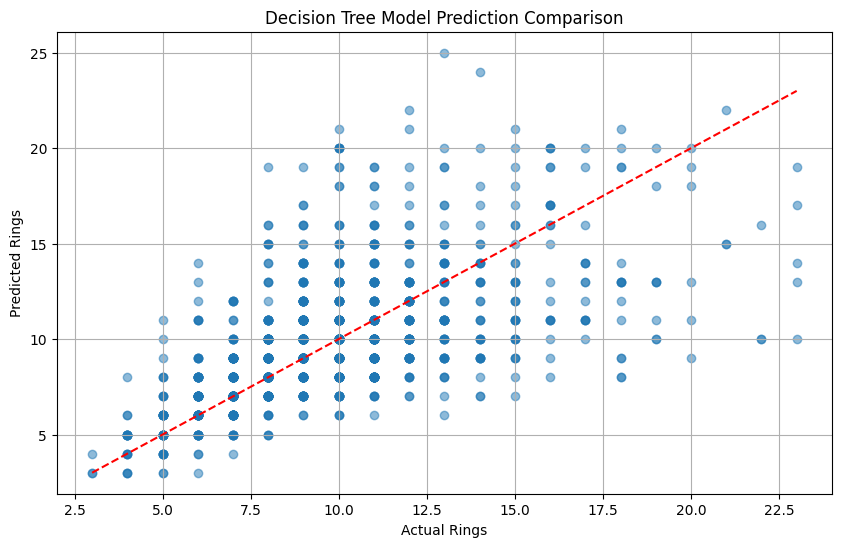


最佳参数:
max_depth: 5
min_samples_leaf: 8
min_samples_split: 2

优化后的决策树模型性能:
均方误差 (MSE): 5.4000
均方根误差 (RMSE): 2.3238
平均绝对误差 (MAE): 1.6300
决定系数 (R²): 0.4682


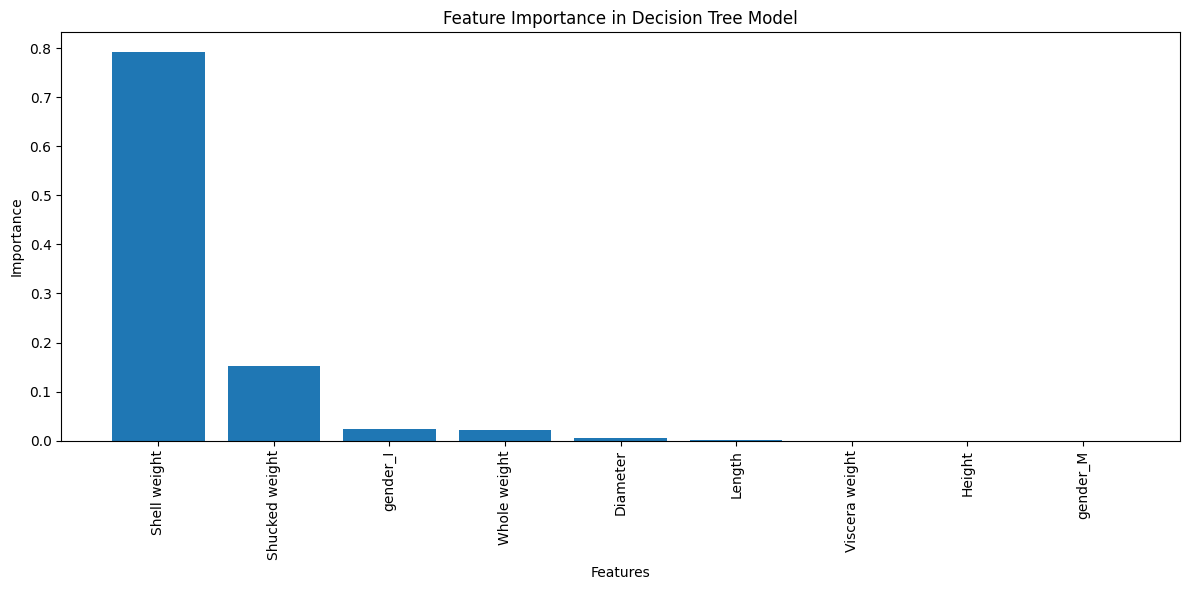

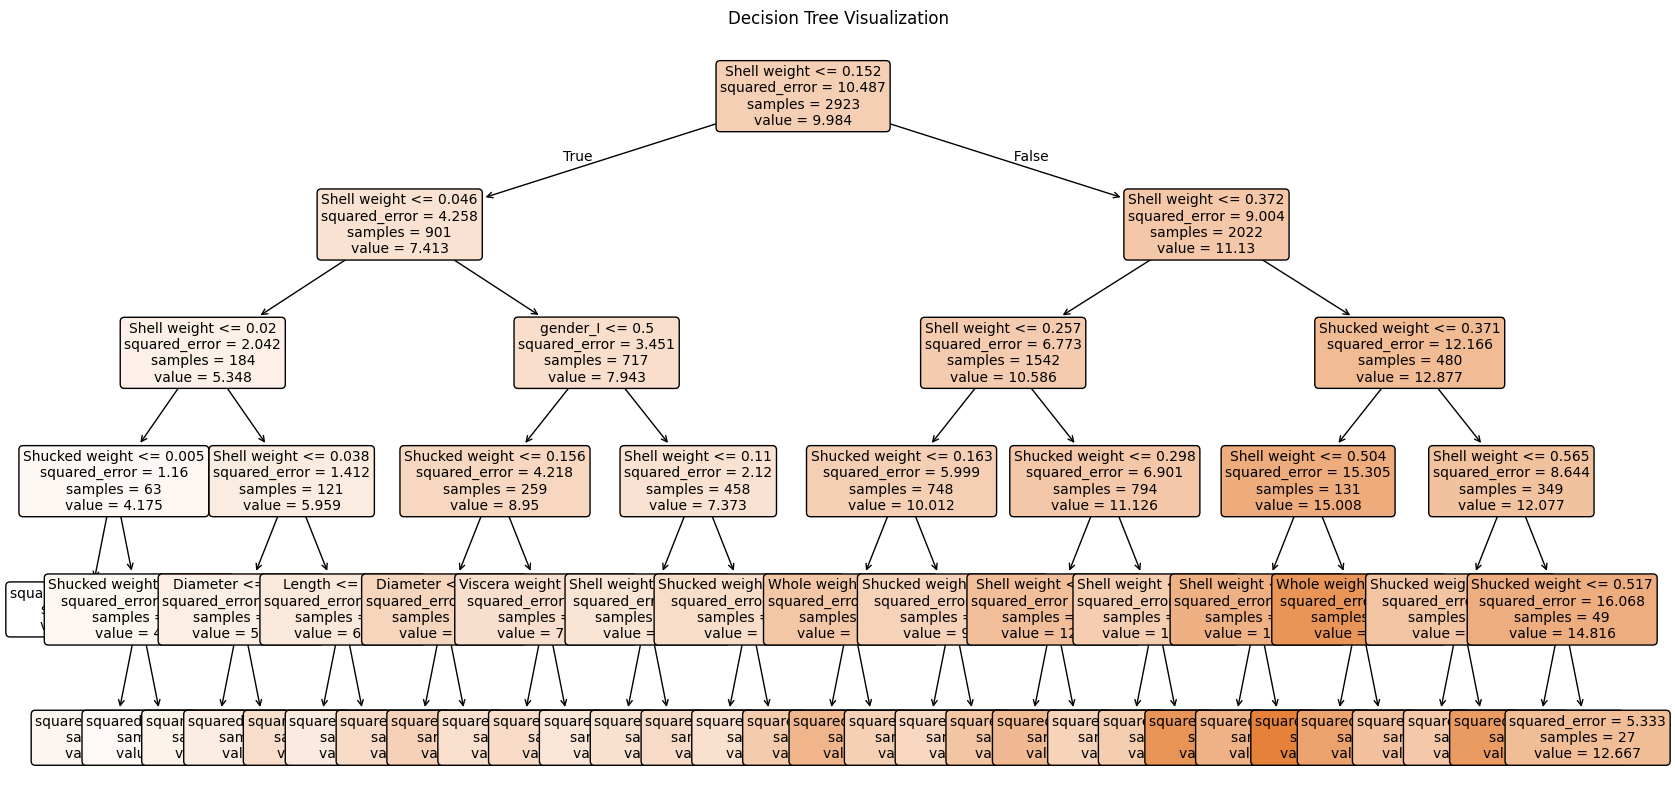

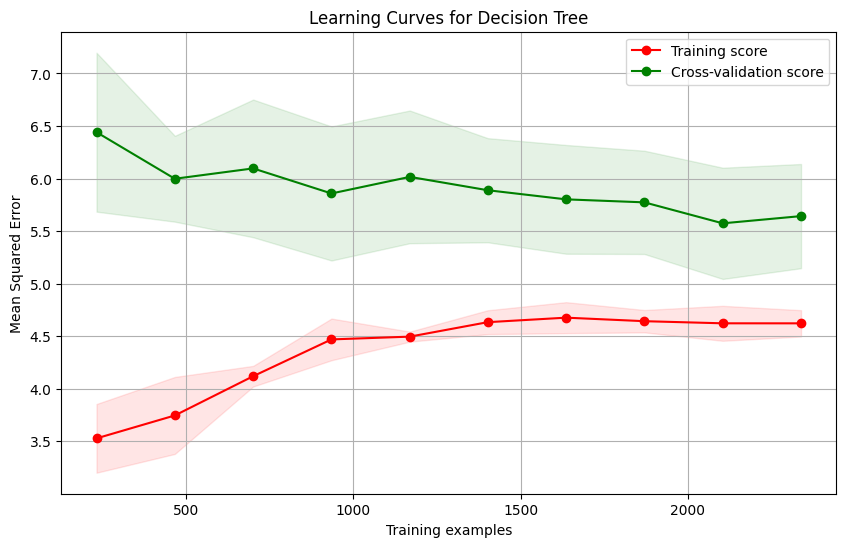

In [4]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd

# 1. 创建决策树回归模型（先使用默认参数）
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# 2. 在测试集上进行预测
y_pred = dt_regressor.predict(X_test)

# 3. 评估模型性能
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("决策树模型性能 (默认参数):")
print(f"均方误差 (MSE): {mse:.4f}")
print(f"均方根误差 (RMSE): {rmse:.4f}")
print(f"平均绝对误差 (MAE): {mae:.4f}")
print(f"决定系数 (R²): {r2:.4f}")

# 4. 可视化实际值与预测值的对比
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Decision Tree Model Prediction Comparison')
plt.grid(True)
plt.show()

# 5. 超参数调优
param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# 6. 输出最佳参数
best_params = grid_search.best_params_
print("\n最佳参数:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# 7. 使用最佳参数重新训练模型
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)
best_pred = best_dt.predict(X_test)

# 8. 评估优化后的模型性能
best_mse = mean_squared_error(y_test, best_pred)
best_rmse = np.sqrt(best_mse)
best_mae = mean_absolute_error(y_test, best_pred)
best_r2 = r2_score(y_test, best_pred)

print("\n优化后的决策树模型性能:")
print(f"均方误差 (MSE): {best_mse:.4f}")
print(f"均方根误差 (RMSE): {best_rmse:.4f}")
print(f"平均绝对误差 (MAE): {best_mae:.4f}")
print(f"决定系数 (R²): {best_r2:.4f}")

# 9. 特征重要性分析
feature_importance = best_dt.feature_importances_
feature_names = X_train.columns

# 创建特征重要性DataFrame并排序
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})
importance_df = importance_df.sort_values('Importance', ascending=False)

# 可视化特征重要性
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree Model')
plt.tight_layout()
plt.show()

# 10. 可视化决策树（如果树不太大）
if best_params['max_depth'] is not None and best_params['max_depth'] <= 5:
    plt.figure(figsize=(20, 10))
    tree.plot_tree(best_dt, 
                   feature_names=feature_names,
                   filled=True, 
                   rounded=True, 
                   fontsize=10)
    plt.title('Decision Tree Visualization')
    plt.show()
else:
    print("\n决策树太大，无法可视化完整树结构。")
    
    # 可视化一个简化版的树（限制深度为3）
    simplified_dt = DecisionTreeRegressor(max_depth=3, random_state=42)
    simplified_dt.fit(X_train, y_train)
    
    plt.figure(figsize=(20, 10))
    tree.plot_tree(simplified_dt, 
                   feature_names=feature_names,
                   filled=True, 
                   rounded=True, 
                   fontsize=10)
    plt.title('Simplified Decision Tree (max_depth=3)')
    plt.show()

# 11. 学习曲线分析 - 观察训练集大小对性能的影响
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_dt, X_train, y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='neg_mean_squared_error'
)

# 计算平均值和标准差
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 绘制学习曲线
plt.figure(figsize=(10, 6))
plt.grid()
plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1, color="r")
plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves for Decision Tree")
plt.legend(loc="best")
plt.show()



In [8]:
# 结合方法2和方法4的示例
from sklearn.model_selection import cross_val_score


def evaluate_models(models_dict, X, y, cv=5, test_size=0.3, random_state=42):
    """评估多个模型并返回结果"""
    # 分割数据
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    results = {}
    
    for name, model in models_dict.items():
        print(f"\n评估模型: {name}")
        
        # 交叉验证
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
        mae_cv = -cv_scores.mean()
        
        # 在测试集上评估
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae_test = mean_absolute_error(y_test, y_pred)
        
        results[name] = {
            'model': model,
            'mae_cv': mae_cv,
            'mae_test': mae_test
        }
        
        print(f"交叉验证MAE: {mae_cv:.4f}")
        print(f"测试集MAE: {mae_test:.4f}")
    
    # 创建比较表格
    comparison = pd.DataFrame({
        'Model': list(results.keys()),
        'CV MAE': [results[name]['mae_cv'] for name in results],
        'Test MAE': [results[name]['mae_test'] for name in results]
    })
    
    return comparison.sort_values('CV MAE')

# 定义要评估的模型
models = {
    'Linear Regression': LinearRegression(),
    'DecisionTreeRegressor' : DecisionTreeRegressor(max_depth=5, random_state=42,min_samples_leaf=8,min_samples_split=2),
}

# 评估所有模型
results_table = evaluate_models(models, X, y, cv=5)
print("\n模型比较:")
print(results_table)



评估模型: Linear Regression
交叉验证MAE: 1.5957
测试集MAE: 1.5832

评估模型: DecisionTreeRegressor
交叉验证MAE: 1.6666
测试集MAE: 1.6300

模型比较:
                   Model    CV MAE  Test MAE
0      Linear Regression  1.595711  1.583238
1  DecisionTreeRegressor  1.666609  1.629956
